In [102]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    if img.ndim == 2:
        plt.imshow(img, cmap='gray')
    else:
        plt.imshow(img[...,::-1])
    plt.axis('off')
    plt.show()

In [105]:
# 背景画像及び前景画像を読み込む。
background = cv2.imread('image/background.jpg')
#foreground = cv2.imread('image/foreground.png')
#foreground = cv2.imread('image/airplane.jpg')
#background = cv2.imread('image/lab.jpg')
#foreground = cv2.imread('image/pikachu.png')
foreground = cv2.imread('image/tzuyu_3.jpg')


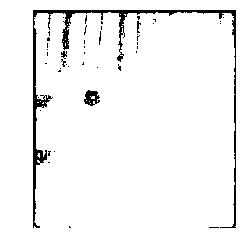

In [106]:
# グレースケールに変換する。
gray = cv2.cvtColor(foreground, cv2.COLOR_BGR2GRAY)
# 2値化する。
_, binary = cv2.threshold(gray, 250, 255, cv2.THRESH_BINARY_INV)
imshow(binary)

In [92]:
# 輪郭抽出する。
#_, contours, hierarchy = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours, hierarchy = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

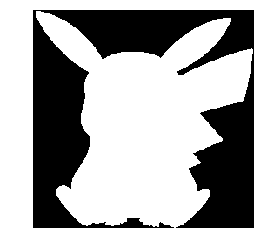

In [93]:
# 検出された輪郭内部を (255, 255, 255) で塗りつぶす。
mask = np.zeros_like(foreground)
cv2.drawContours(mask, contours, -1, color=(255, 255, 255), thickness=-1)

# 以上の手順で前景画像のうち、合成する画素を (255, 255, 255) としたマスク画像が作成できた。
imshow(mask)

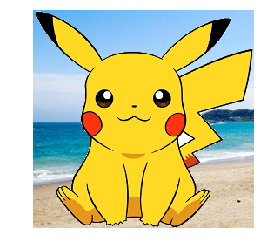

In [94]:
h, w = foreground.shape[:2]  # 前景画像の大きさ
x, y = 100, 200  # 背景画像の座標上で前景画像を貼り付ける位置
roi = background[y:y + h, x:x + w, :]
result = np.where(mask==255, foreground, roi)

imshow(result)